In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
import torch
import wplotlib

Examples of both "with" and "without" batch normalization<br>
The idea of training a neural network boils down to 3 steps<br>
	1. Define a network structure<br>
		Example: This is a 3 layer network with 100 node width<br>
			networkStructure=[(100,'relu'),(100,'relu'),(1,'none')]<br>
			Potential Activation Functions are: softmax, relu, tanh, sigmoid, none<br>
	2. Define a cost function<br>
	3. Call train()

In [4]:
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
def costFunction(x, y, ŷ, ind):
	return torch.sum((y- ŷ) ** 2)	

----------------------------------------------<br>
Create basic network and train

In [5]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(30,'relu'),(50,'relu'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=True)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

	epoch: 500, Avg Loss: 4.7824, Learning Rate: 0.00100000

Check out our predictions

In [6]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
wuml.jupyter_print(SR.true_vs_predict(print_result=False))

,0,1
0,y,ŷ
1,1.1,1.11
2,1.1,1.62
3,2.2,1.62
4,1.0,2.2
5,2.0,2.2
6,3.0,2.2
7,2.0,2.86
8,3.0,2.86
9,4.0,2.86


Draw the regression line

In [7]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

----------------------------------------------<br>
Create network with batch normalization and train		<br>
For bn layers, ('bn', False), the 2nd boolean term sets if we use γ,β terms or not

In [8]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(30,'relu'),('bn', True), (50,'relu'),('bn', True),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=True)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

	epoch: 500, Avg Loss: 4.6050, Learning Rate: 0.00003125

Check out our predictions

In [9]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
wuml.jupyter_print(SR.true_vs_predict(print_result=False))

,0,1
0,y,ŷ
1,1.1,1.1
2,1.1,1.65
3,2.2,1.65
4,1.0,2.0
5,2.0,2.0
6,3.0,2.0
7,2.0,3.0
8,3.0,3.0
9,4.0,3.0


Draw the regression line

In [10]:
newX_bn = np.expand_dims(np.arange(0,5,0.1),1)
bNet.eval()		# if using BN you should set setting to eval before evaluating test samples
Ŷline_bn = bNet(newX_bn, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

plot the results out

In [11]:
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False, subplot=121)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='Without Batch Normalization', xlim=[0,5], ylim=[0,5], show=False)	# show must be false if it is a subplot

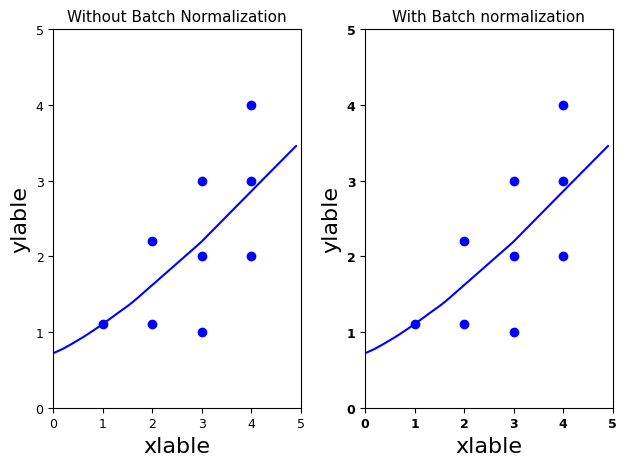

In [12]:
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False, subplot=122)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='With Batch normalization', xlim=[0,5], ylim=[0,5], )	